# Apriori

### Data Preprocessing

In [1]:
dataset = read.csv('Market_Basket_Optimisation.csv', header = FALSE)
# There is no header in dataset

In [2]:
head(dataset, 10)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
burgers,meatballs,eggs,,,,,,,,,,,,,,,,,
chutney,,,,,,,,,,,,,,,,,,,
turkey,avocado,,,,,,,,,,,,,,,,,,
mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,
low fat yogurt,,,,,,,,,,,,,,,,,,,
whole wheat pasta,french fries,,,,,,,,,,,,,,,,,,
soup,light cream,shallot,,,,,,,,,,,,,,,,,
frozen vegetables,spaghetti,green tea,,,,,,,,,,,,,,,,,
french fries,,,,,,,,,,,,,,,,,,,


In [3]:
dim(dataset)

[1] 7501   20

***

**Data contain 120 products.**

***

In [14]:
# install.packages('arules')
library(arules)

In [5]:
dataset = read.transactions('Market_Basket_Optimisation.csv', 
                            sep = ',', 
                            rm.duplicates =  TRUE)

distribution of transactions with duplicates:
1 
5 


***

**There are 5 transactions with 1 duplicates each.**

***

In [6]:
summary(dataset)

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

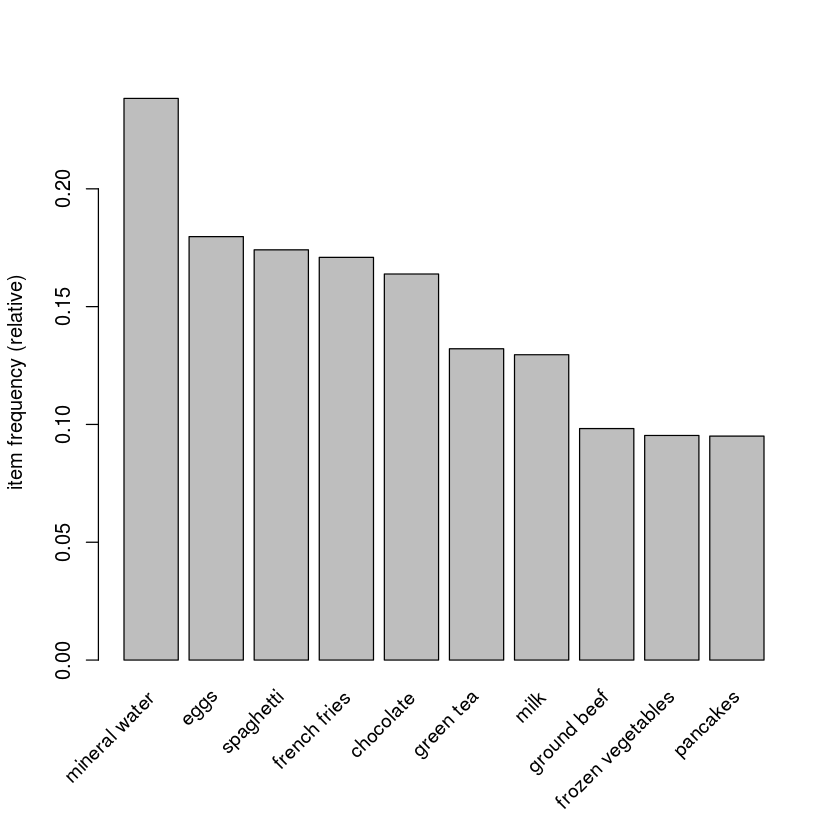

In [7]:
# Top 10 sale items
itemFrequencyPlot(dataset, topN = 10)

### Training Apriori on the dataset

In [11]:
min_support = 4*7/7500
min_support

[1] 0.003733333

In [12]:
rules = apriori(data = dataset, 
                parameter = list(support = min_support, confidence = 0.2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime     support minlen
        0.2    0.1    1 none FALSE            TRUE       5 0.003733333      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 28 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [916 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


### Visualization of the result

In [13]:
inspect(sort(rules, by = 'lift')[1:10])

     lhs                                  rhs             support    
[1]  {mineral water,whole wheat pasta} => {olive oil}     0.003866151
[2]  {light cream}                     => {chicken}       0.004532729
[3]  {pasta}                           => {escalope}      0.005865885
[4]  {pasta}                           => {shrimp}        0.005065991
[5]  {chocolate,herb & pepper}         => {ground beef}   0.003999467
[6]  {eggs,ground beef}                => {herb & pepper} 0.004132782
[7]  {whole wheat pasta}               => {olive oil}     0.007998933
[8]  {herb & pepper,spaghetti}         => {ground beef}   0.006399147
[9]  {herb & pepper,mineral water}     => {ground beef}   0.006665778
[10] {frozen vegetables,soup}          => {milk}          0.003999467
     confidence lift     count
[1]  0.4027778  6.115863 29   
[2]  0.2905983  4.843951 34   
[3]  0.3728814  4.700812 44   
[4]  0.3220339  4.506672 38   
[5]  0.4411765  4.490183 30   
[6]  0.2066667  4.178455 31   
[7]  0.271493